<h1>ANÁLISE DE UM MODELO PREDITIVO DE EVASÃO NO ENSINO SUPERIOR<h1>

**OBJETIVOS DO PROJETO**: O objetivo central deste projeto é analisar um conjunto de dados com informações referentes ao desempenho do aluno em dois semestres e realizar uma análise preditiva com o intuito de apontar possíveis evasões de alunos na virada de semestres, com base no desempenho do aluno no semestre anterior.

**Por que este projeto pode ser importante para um negócio do meio educacional?** A resposta é muito simples: todo negócio precisa de manter uma carteira fidelizada de clientes. Em uma instituição de ensino não é diferente. A instituição precisa manter o aluno matriculado, pois é desta forma que a mesma gera receitas. A importância deste se dá justamente por tentar amenizar os impactos da evasão no negócio.

**Quem será o alvo da análise do projeto?** O alvo principal desta análise são os clientes, ou seja, os alunos da instituição.

**O que iremos analisar neste projeto?** O ponto focal desta análise será o desempenho do aluno, ou seja, como ele se comporta no decorrer de um semestre letivo para o outro e se, de acordo com este comportamento, ele pode vir a evadir ou não.




<h2>1. COLETA DE DADOS </h2>

In [2]:
##IMPORTANDO AS LIBS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycaret
import re
import seaborn as sns

In [56]:
##IMPORTANDO O DATASET

df = pd.read_csv('tcc4.csv', delimiter=';', encoding='latin-1')
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df

,id,curso,maior_nota,menor_nota,media,atingiu_media,faltas,status,evadiu,atraso,acordo,periodo
0,519,Educação Física,2,1,"1,67",0,32,Evadido,1,1,0,6
1,655,Enfermagem,5,0,"0,94",0,18,Cursando,0,1,0,8
2,741,Biologia,"2,5",0,"0,58",0,62,Cursando,0,1,0,8
3,748,Matemática,0,0,0,0,40,Cursando,0,0,0,8
4,1016,Enfermagem,"3,5",0,"1,17",0,14,Evadido,1,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3998,74345,Biologia,10,0,"6,44",1,16,Outros,0,1,0,8
3999,74350,Gastronomia,9,5,"7,08",1,12,Cursando,0,0,0,8
4000,74355,Administração,"5,5",1,"3,75",0,12,Cursando,0,0,0,8
4001,74357,Administração,8,5,"6,3",1,4,Cursando,0,1,0,8


<h2>2. ANÁLISE EXPLORATÓRIA </h2>

In [58]:
#TOTAL DE ALUNOS

total = df['id'].count()
total


4003

In [59]:
##TOTAL DE ALUNOS POR CURSO

curso = df['curso'].value_counts()
curso

Administração         1120
Educação Física        694
Letras                 597
Enfermagem             441
Matemática             367
Gastronomia            363
Biologia               328
História                73
Ciências Contábeis      20
Name: curso, dtype: int64

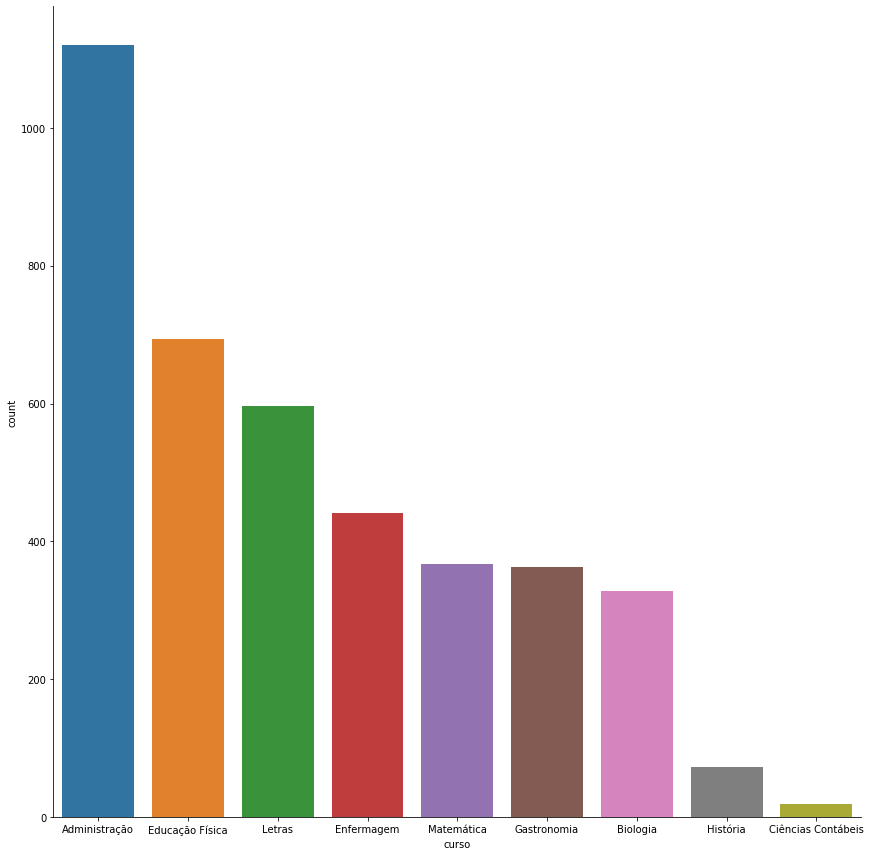

In [61]:
##GRÁFICO: TOTAL DE ALUNOS POR CURSO

sns.catplot(x="curso", kind="count", dodge=True, height=12, order=curso.index, data=df)

In [62]:
##TOTAL DE EVASÕES

evasoes = df[df['evadiu']==1]
evasoes = evasoes['evadiu'].count()
evasoes

296

In [63]:
##TOTAL DE EVASÕES POR CURSO

curso_evasoes = df[df['evadiu']==1]
curso_evasoes_val = curso_evasoes['curso'].value_counts()
curso_evasoes_val

Administração         83
Educação Física       51
Letras                34
Enfermagem            31
Biologia              29
Matemática            29
Gastronomia           23
História              13
Ciências Contábeis     3
Name: curso, dtype: int64

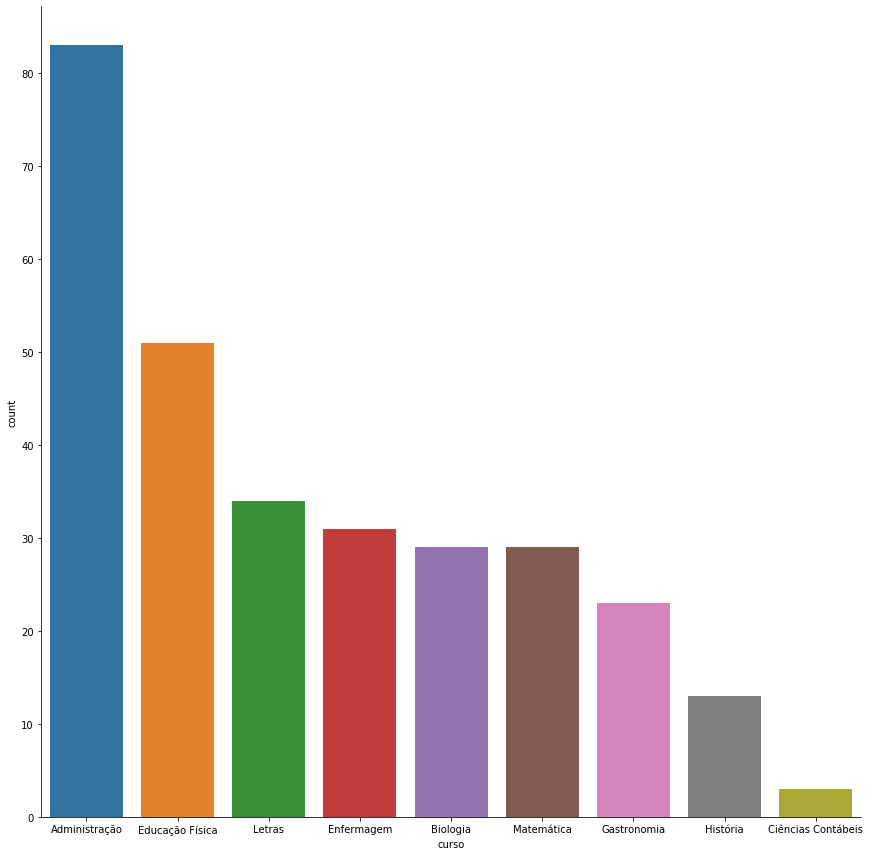

In [64]:
##GRÁFICO: TOTAL DE EVASÕES POR CURSO

sns.catplot(x="curso",kind="count",order=curso_evasoes_val.index,height=12,data=curso_evasoes)

In [53]:
##PERCENTUAL DE EVASÕES

perc = (evasoes/total)*100
print("% de evasões: "+str(perc))

% de evasões: 7.394454159380465


In [54]:
##PERCENTUAL DE EVASÕES POR CURSO

perc_curso = (curso_evasoes_val/curso)* 100
perc_curso

Administração          7.410714
Biologia               8.841463
Ciências Contábeis    15.000000
Educação Física        7.348703
Enfermagem             7.029478
Gastronomia            6.336088
História              17.808219
Letras                 5.695142
Matemática             7.901907
Name: curso, dtype: float64

In [55]:
##TOTAL DE ALUNOS COM MÉDIA

atingiu = df[df['atingiu_media']==1]
atingiu = atingiu['atingiu_media'].count()
atingiu

3024

In [56]:
##TOTAL DE ALUNOS SEM MÉDIA

n_atingiu = df[df['atingiu_media']==0]
n_atingiu = n_atingiu['atingiu_media'].count()
n_atingiu

979

In [57]:
##TOTAL DE EVASÕES DE ALUNOS SEM MÉDIA

evasoes_media = df[df['evadiu']==1]
evasoes_media = evasoes_media[evasoes_media['atingiu_media']==0]
evasoes_media = evasoes_media['evadiu'].count()
evasoes_media

207

In [58]:
##PERCENTUAL DE ALUNOS QUE EVADEM SEM MÉDIA EM RELAÇÃO AO TOTAL DE ALUNOS SEM MÉDIA

perc_media = (evasoes_media/n_atingiu)*100
perc_media

21.144024514811033

In [59]:
##PERCENTUAL DE EVASÕES DE ALUNOS SEM MÉDIA EM RELAÇÃO AO TOTAL DE EVASÕES

perc_evasoes_media = (evasoes_media/evasoes)*100
perc_evasoes_media

69.93243243243244

In [60]:
##TOTAL DE ALUNOS COM ATRASO EM MENSALIDADES

atraso = df[df['atraso']==1]
atraso = atraso['atraso'].count()
atraso

1684

In [61]:
##TOTAL DE EVASÕES DE ALUNOS COM ATRASO EM MENSALIDADES

evasoes_atraso = df[df['evadiu']==1]
evasoes_atraso = evasoes_atraso[evasoes_atraso['atraso']==1]
evasoes_atraso = evasoes_atraso['evadiu'].count()
evasoes_atraso

168

In [62]:
##PERCENTUAL DE EVASÕES DE ALUNOS COM ATRASO FINANCEIRO EM RELAÇÃO AO TOTAL DE EVASÕES

perc_evasoes_atraso = (evasoes_atraso/evasoes)*100
perc_evasoes_atraso

56.75675675675676

In [63]:
##TOTAL DE ALUNOS COM ACORDO

acordo = df[df['acordo']==1]
acordo = acordo['acordo'].count()
acordo

99

In [64]:
##TOTAL DE EVASÕES DE ALUNOS COM ACORDO FINANCEIRO

evasoes_acordo = df[df['evadiu']==1]
evasoes_acordo = evasoes_acordo[evasoes_acordo['acordo']==1]
evasoes_acordo = evasoes_acordo['evadiu'].count()
evasoes_acordo

19

In [65]:
##PERCENTUAL DE EVASÕES DE ALUNOS COM ACORDO EM RELAÇÃO AO TOTAL DE ACORDOS

perc_acordo = (evasoes_acordo/acordo)*100
perc_acordo

19.19191919191919

In [66]:
##PERCENTUAL DE EVASÕES POR ACORDO EM RELAÇÃO AO TOTAL DE EVASÕES

perc_evasoes_acordo = (evasoes_acordo/evasoes)*100
perc_evasoes_acordo

6.418918918918918

In [67]:
##TOTAL DE EVASÕES POR PERÍODO

curso_evasoes = df[df['evadiu']==1]
curso_evasoes = curso_evasoes['periodo'].value_counts()
curso_evasoes

2     123
4      80
6      64
8      25
10      4
Name: periodo, dtype: int64

In [71]:
##MATRIZ DE CORRALEÇÃO

df2 = df.drop('status',axis=1)
df2 = df2.drop('id',axis=1)
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,atingiu_media,faltas,evadiu,atraso,acordo,periodo
atingiu_media,1.000000,-0.533502,-0.298963,-0.135564,-0.107731,0.123342
faltas,-0.533502,1.000000,0.247435,0.165384,0.126476,0.075148
evadiu,-0.298963,0.247435,1.000000,0.084076,0.071793,-0.160552
atraso,-0.135564,0.165384,0.084076,1.000000,0.167321,0.069853
acordo,-0.107731,0.126476,0.071793,0.167321,1.000000,0.043865
periodo,0.123342,0.075148,-0.160552,0.069853,0.043865,1.000000


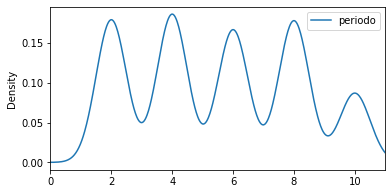

In [93]:
##GRÁFICO DE DENSIDADE: PERÍODO

df.plot.density(y='periodo',xlim=[0,11],figsize=[6,3])


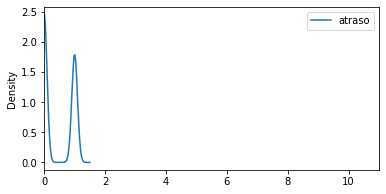

In [67]:
##GRÁFICO DE DENSIDADE: ATRASOS NA MENSALIDADE

df.plot.density(y='atraso',xlim=[0,11],figsize=[6,3])

<h2>3. TRATAMENTO DOS DADOS </h2>

In [4]:
##IMPORTANDO AS LIBS

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [15]:
##VERIFICANDO OS DADOS DO DATAFRAME

df.head()

,id,curso,maior_nota,menor_nota,media,atingiu_media,faltas,status,evadiu,atraso,acordo,periodo
0,519,Educação Física,2,1,"1,67",0,32,Evadido,1,1,0,6
1,655,Enfermagem,5,0,"0,94",0,18,Cursando,0,1,0,8
2,741,Biologia,"2,5",0,"0,58",0,62,Cursando,0,1,0,8
3,748,Matemática,0,0,0,0,40,Cursando,0,0,0,8
4,1016,Enfermagem,"3,5",0,"1,17",0,14,Evadido,1,1,0,10


In [101]:
##INFORMAÇÕES DO DATAFRAME:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4003 non-null   int64 
 1   curso          4003 non-null   object
 2   maior_nota     4003 non-null   object
 3   menor_nota     4003 non-null   object
 4   media          4003 non-null   object
 5   atingiu_media  4003 non-null   int64 
 6   faltas         4003 non-null   int64 
 7   status         4003 non-null   object
 8   evadiu         4003 non-null   int64 
 9   atraso         4003 non-null   int64 
 10  acordo         4003 non-null   int64 
 11  periodo        4003 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 375.4+ KB


In [100]:
##CHECANDO VALORES FALTANTES

df.isnull().sum()

id               0
curso            0
maior_nota       0
menor_nota       0
media            0
atingiu_media    0
faltas           0
status           0
evadiu           0
atraso           0
acordo           0
periodo          0
dtype: int64

In [109]:
##VERIFICANDO BALANCEAMENTO DO DATASET

df4 = pd.get_dummies(df)
df4.head().T

,0,1,2,3,4
id,519,655,741,748,1016
atingiu_media,0,0,0,0,0
faltas,32,18,62,40,14
evadiu,1,0,0,0,1
atraso,1,1,1,0,1
...,...,...,...,...,...
"media_9,94",0,0,0,0,0
status_Aluno Formado,0,0,0,0,0
status_Cursando,0,1,1,1,0
status_Evadido,1,0,0,0,1


In [110]:
##CONTAGEM DA VARIÁVEL ALVO

df4.evadiu.value_counts()

0    3707
1     296
Name: evadiu, dtype: int64

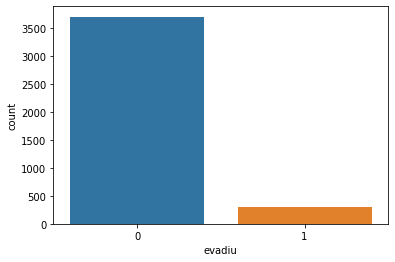

In [111]:
##GRÁFICO: CONTAGEM DA VARIÁVEL ALVO

sns.countplot(x="evadiu", data=df4)

<h3> PRIMEIRO TESTE COM O DATASET USANDO REGRESSÃO LOGÍSTICA </h3>

In [68]:
##INICIANDO O MODELO

lr = LogisticRegression(solver='saga',max_iter=10000)

In [5]:
cols2 = ['evadiu','status','maior_nota','menor_nota','media','curso']

In [18]:
##QUEBRANDO O DATASET EM X E Y

X = df.drop(cols2, axis = 1)
y = df.evadiu

In [176]:
##DECLARANDO AS VARIÁVEIS PARA O MODELO

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [177]:
##REALIZANDO O FIT DO MODELO

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [178]:
##CRIANDO A PREDIÇÃO

y_pred = lr.predict(X_test)

In [179]:
##VERIFICANDO A ACURÁCIA

accuracy_score(y_test, y_pred)

0.926073926073926

In [180]:
##VERIFICANDO O RELATÓRIO DE CLASSIFICAÇÃO

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       927
           1       0.00      0.00      0.00        74

    accuracy                           0.93      1001
   macro avg       0.46      0.50      0.48      1001
weighted avg       0.86      0.93      0.89      1001



C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
##VERIFICANDO A TABELA CRUZADA

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0   All
Real               
0         927   927
1          74    74
All      1001  1001


**NESTE PRIMEIRO MOMENTO, FICA EVIDENTE QUE O DATASET ESTÁ DESBALANCEADO.**

COMO PODE SER OBSERVADO, O MODELO RETORNOU UMA ACURÁCIA MUITO ALTA, PORÉM AO VERIFICAR O RELATÓRIO DE CLASSIFICAÇÃO, FOI POSSÍVEL OBSERVAR QUE A PRECISÃO, O RECALL E A F MEDIDA ESTÃO ZERADAS PARA O ALVO 1.

<h3> BALANCEAMENTO UTILIZANDO O NEARMISS </h3>

In [182]:
##INICIALIZANDO O NEARMISS

nr = NearMiss()

In [183]:
##APLICANDO O NEARMISS EM X E Y

X, y = nr.fit_sample(X, y)

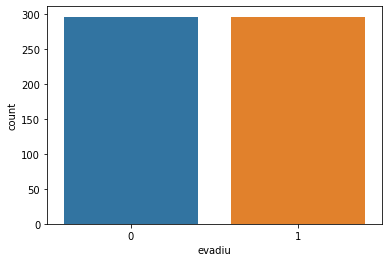

In [184]:
##GRÁFICO: CONTAGEM DA VARIÁVEL ALVO

sns.countplot(x=y)

In [185]:
##DECLARANDO AS VARIÁVEIS PARA O MODELO

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [186]:
##REALIZANDO O FIT NO MODELO

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [187]:
##CRIANDO A PREDIÇÃO

y_pred = lr.predict(X_test)

In [188]:
##VERIFICANDO A ACURÁCIA

accuracy_score(y_test, y_pred)

0.6283783783783784

In [189]:
##VERIFICANDO O RELATÓRIO DE CLASSIFICAÇÃO

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70        74
           1       0.74      0.39      0.51        74

    accuracy                           0.63       148
   macro avg       0.67      0.63      0.61       148
weighted avg       0.67      0.63      0.61       148



In [190]:
##VERIFICANDO A TABELA CRUZADA

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0         64  10   74
1         45  29   74
All      109  39  148


**RESULTADO DO PRIMEIRO BALANCEAMENTO:** COMO PODE SER OBSERVADO, AO UTILIZAR O NEARMISS, A ACURÁCIA DO MODELO TEVE UMA QUEDA SIGNIFICATIVA, PORÉM OS VALORES DE PRECISÃO, RECALL E F MEDIDA AGORA PODEM SER AVALIADOS, EMBORA AINDA NÃO SEJAM SATISFATÓRIOS.

<h3>BALANCEAMENTO UTILIZANDO O SMOTE </h3>

In [71]:
##SEPARANDO NOVAMENTE O DATASET EM X E Y

X = df.drop(cols2, axis = 1)
y = df.evadiu

In [192]:
##CONTAGEM DO ALVO

np.bincount(y)

array([3707,  296], dtype=int64)

In [72]:
##INICIALIZANDO O SMOTE

smt = SMOTE()

In [73]:
##APLICANDO O SMOTE EM X E Y

X, y = smt.fit_sample(X, y)

In [19]:
##NOVA CONTAGEM DO ALVO

np.bincount(y)

array([3707, 3707], dtype=int64)

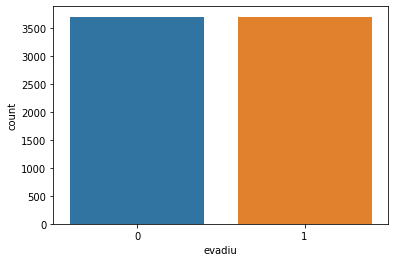

In [196]:
##GRÁFICO: CONTAGEM DO ALVO APÓS O SMOTE

sns.countplot(x=y)

In [197]:
##CRIANDO AS VARIÁVEIS DO MODELO

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [198]:
#REALIZANDO O FIT NO MODELO

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [199]:
##CRIANDO A PREDIÇÃO

y_pred = lr.predict(X_test)

In [200]:
##VERIFICANDO A ACURÁCIA

accuracy_score(y_test, y_pred)

0.6693635382955772

In [201]:
##VERIFICANDO O RELATÓRIO DE CLASSIFICAÇÃO

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62       927
           1       0.63      0.80      0.71       927

    accuracy                           0.67      1854
   macro avg       0.68      0.67      0.66      1854
weighted avg       0.68      0.67      0.66      1854



In [202]:
##VERIFICANDO A TABELA CRUZADA

print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0     1   All
Real                    
0        500   427   927
1        186   741   927
All      686  1168  1854


**CONCLUSÃO DO BALANCEAMENTO:** CONFORME OBSERVADO, O SMOTE ATINGIU UM MELHOR RESULTADO. TENDO NÚMEROS SUPERIORES AO NEARMISS, O QUE ATRIBUI UMA CHANCE MAIOR DE MELHORES RESULTADOS.

<h2>4. AVALIANDO O MELHOR MODELO USANDO O PYCARET </h2>

<h5>CONFORME AS ANÁLISES ACIMA, FOI OBSERVADA A NECESSIDADE DO BALANCEAMENTO NO DATASET. DESTA FORMA A ANÁLISE COM O PYCARET SERÁ FEITA UTILIZANDO O DATASET JÁ BALANCEADO COM O SMOTE, POIS APRESENTOU MELHORES RESULTADOS.

In [74]:
##CRIANDO UM NOVO DATAFRAME COM OS VALORES BALANCEADOS

df_pyc = pd.DataFrame(X)
df_pyc = df_pyc.assign(evadiu=pd.Series(y).values)

In [24]:
##VALORES DO DATASET

df_pyc.head()

,id,atingiu_media,faltas,atraso,acordo,periodo,evadiu
0,519,0,32,1,0,6,1
1,655,0,18,1,0,8,0
2,741,0,62,1,0,8,0
3,748,0,40,0,0,8,0
4,1016,0,14,1,0,10,1


In [75]:
##INFORMAÇÕES DO DATASET

df_pyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             7414 non-null   int64
 1   atingiu_media  7414 non-null   int64
 2   faltas         7414 non-null   int64
 3   atraso         7414 non-null   int64
 4   acordo         7414 non-null   int64
 5   periodo        7414 non-null   int64
 6   evadiu         7414 non-null   int64
dtypes: int64(7)
memory usage: 405.6 KB


In [80]:
##INICIALIZANDO O SETUP DE CLASSIFICAÇÃO

from pycaret.classification import *
clf1 = setup(data = df_pyc, target = 'evadiu')

Setup Succesfully Completed!


,Description,Value
0,session_id,1274
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(7414, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [35]:
##COMPARANDO OS MODELOS

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8957,0.9581,0.9229,0.8755,0.8985,0.7915,0.7928,0.2424
1,CatBoost Classifier,0.8925,0.9588,0.9229,0.8704,0.8957,0.7849,0.7868,6.9654
2,Random Forest Classifier,0.8846,0.9463,0.8994,0.8737,0.8862,0.7691,0.7698,0.1238
3,Decision Tree Classifier,0.8826,0.8831,0.8982,0.8712,0.8844,0.7653,0.7658,0.0290
4,Extra Trees Classifier,0.8824,0.9481,0.9083,0.8638,0.8853,0.7649,0.7663,0.5443
5,Gradient Boosting Classifier,0.8738,0.9406,0.9044,0.8525,0.8775,0.7475,0.7492,0.8254
6,Extreme Gradient Boosting,0.8717,0.9369,0.9048,0.8488,0.8758,0.7433,0.7452,0.4580
7,Ada Boost Classifier,0.8618,0.9295,0.8867,0.8450,0.8651,0.7236,0.7249,0.3774
8,Ridge Classifier,0.8478,0.0000,0.8874,0.8224,0.8536,0.6955,0.6980,0.0148
9,Linear Discriminant Analysis,0.8478,0.9145,0.8874,0.8224,0.8536,0.6955,0.6980,0.0259


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1451, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

<h5>OBSERVADO QUE OS MELHORES RESULTADOS FORAM OBTIDOS COM O MODELO LGBM

In [81]:
##CRIANDO O MODELO

lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8998,0.9642,0.9382,0.8710,0.9033,0.7996,0.8020
1,0.9094,0.9596,0.9382,0.8869,0.9118,0.8189,0.8203
2,0.8786,0.9550,0.9189,0.8500,0.8831,0.7573,0.7598
3,0.8921,0.9576,0.9189,0.8718,0.8947,0.7842,0.7854
4,0.8979,0.9586,0.9382,0.8679,0.9017,0.7958,0.7984
5,0.9171,0.9686,0.9231,0.9125,0.9178,0.8343,0.8343
6,0.8940,0.9577,0.9308,0.8674,0.8980,0.7880,0.7901
7,0.8863,0.9495,0.9231,0.8602,0.8905,0.7726,0.7747
8,0.8902,0.9629,0.8885,0.8919,0.8902,0.7803,0.7804
9,0.9170,0.9672,0.9459,0.8942,0.9193,0.8340,0.8354


In [37]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1451, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [82]:
##REALIZANDO O TUNE DO MODELO

tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9037,0.9609,0.9305,0.8828,0.9060,0.8073,0.8085
1,0.8960,0.9584,0.9228,0.8755,0.8985,0.7919,0.7931
2,0.9075,0.9580,0.9382,0.8836,0.9101,0.8151,0.8166
3,0.8902,0.9598,0.9112,0.8741,0.8922,0.7804,0.7811
4,0.9094,0.9622,0.9421,0.8841,0.9121,0.8189,0.8207
5,0.9133,0.9655,0.9077,0.9183,0.9130,0.8266,0.8266
6,0.9152,0.9621,0.9308,0.9030,0.9167,0.8304,0.8308
7,0.8671,0.9547,0.8731,0.8631,0.8681,0.7341,0.7341
8,0.8998,0.9646,0.9154,0.8881,0.9015,0.7996,0.8000
9,0.9208,0.9716,0.9421,0.9037,0.9225,0.8417,0.8425


In [39]:
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=40,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1451, reg_alpha=0.2, reg_lambda=0.4, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


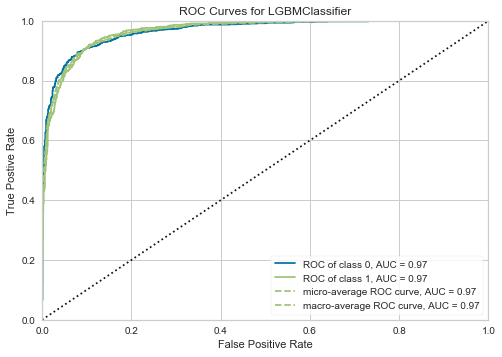

In [40]:
##GRÁFICO AUC: MODELO LGBM APÓS TUNE

plot_model(tuned_lightgbm, plot = 'auc')

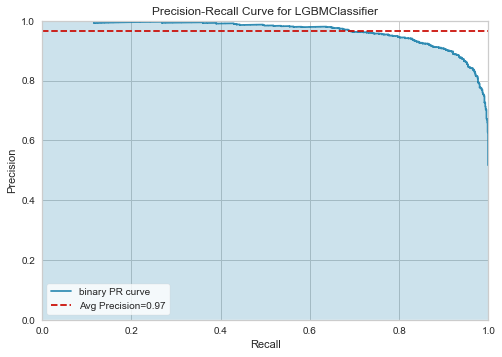

In [41]:
##GRÁFICO PRECISION-RECALL: MODELO LGBM APÓS TUNE

plot_model(tuned_lightgbm, plot = 'pr')

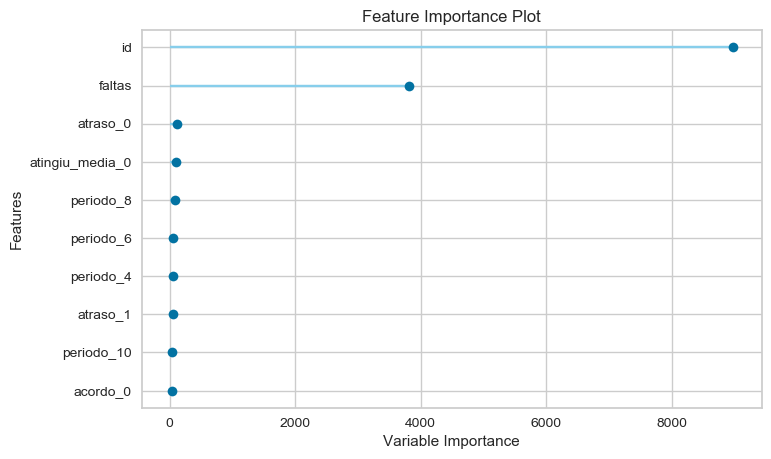

In [42]:
##GRÁFICO DE IMPORTÂNCIA DAS FEATURES

plot_model(tuned_lightgbm, plot='feature')

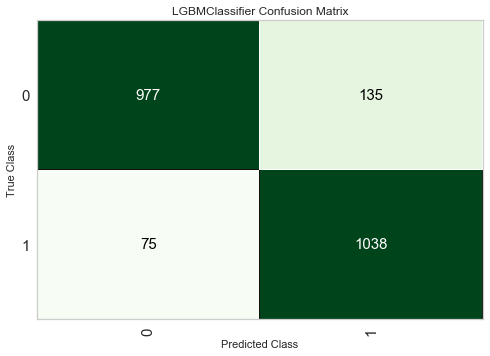

In [43]:
##GRÁFICO: MATRIZ DE CONFUSÃO

plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [83]:
##CONJUNTO DE GRÁFICOS E INFORMAÇÕES DO MODELO

evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [84]:
##CRIANDO MODELO DE PREDIÇÃO

predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9231,0.9732,0.9371,0.9117,0.9242,0.8463,0.8466


In [85]:
##REALIZANDO O FIT DO MODELO

final_lightgbm = finalize_model(tuned_lightgbm)

In [47]:
print(final_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=40,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
               n_estimators=150, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1451, reg_alpha=0.2, reg_lambda=0.4, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [86]:
##CRIANDO MODELO DE PREDIÇÃO

predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9816,0.9986,0.9865,0.9769,0.9817,0.9631,0.9632


<h5>NESTE MOMENTO, JÁ É NOTÁVEL A DIFERENÇA DAS INFORMAÇÕES DO MODELO DE PREDIÇÃO APÓS A REALIZAÇÃO DO TUNE. A DIFERENÇA OCORRE POIS AO CRIAR O MODELO, O PYCARET USA OS HIPERPARÂMETROS PADRÕES PARA TREINAR O MODELO. COM O TUNE, O PYCARET AJUSTA OS HIPERPARÂMETROS USANDO UMA PESQUISA DE GRADE ALEATÓRIA (RANDOM GRID SEARCH), O QUE MELHORA SIGNIFICAVELMENTE O RESULTADO DO MODELO.

In [51]:
##SALVANDO O MODELO

save_model(final_lightgbm,'Final LIGHTGBM')

Transformation Pipeline and Model Succesfully Saved


In [88]:
##CARREGANDO O MODELO

saved_final_lgbm = load_model('Final LIGHTGBM')

Transformation Pipeline and Model Successfully Loaded


In [7]:
##CRIANDO UM DATAFRAME DE TESTE COM DADOS DE UM DATASET DE OUTRO ANO LETIVO

df_teste = pd.read_csv('tcc_teste.csv', delimiter=';', encoding='latin-1')
df_teste = df_teste.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_teste = df_teste.drop('evadiu',axis=1)
df_teste

,id,curso,maior_nota,menor_nota,media,atingiu_media,faltas,status,atraso,acordo,periodo
0,655,Enfermagem,0,0,0,0,28,Cursando,1,0,8
1,741,Biologia,0,0,0,0,30,Cursando,1,0,8
2,748,Matemática,"5,08","1,13","2,87",0,10,Cursando,0,0,4
3,1164,Administração,0,0,0,0,40,Cursando,1,1,6
4,1174,Enfermagem,0,0,0,0,4,Cursando,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...
3993,74345,Biologia,"9,15",5,"6,59",1,6,Cursando,1,1,10
3994,74350,Gastronomia,"8,18",5,"6,48",1,7,Aluno Formado,0,0,10
3995,74355,Administração,"6,25","1,1","4,61",0,8,Cursando,0,0,10
3996,74357,Administração,"8,58","3,18","5,99",1,12,Cursando,1,0,8


In [89]:
##APLICANDO A PREDIÇÃO DO MODELO

new_prediction = predict_model(saved_final_lgbm, data=df_teste)

In [90]:
##VERIFICANDO O RESULTADO

new_prediction

,id,curso,maior_nota,menor_nota,media,atingiu_media,faltas,status,evadiu,atraso,acordo,periodo,Label,Score
0,655,Enfermagem,0,0,0,0,28,Cursando,0,1,0,8,1,0.7974
1,741,Biologia,0,0,0,0,30,Cursando,0,1,0,8,0,0.2001
2,748,Matemática,"5,08","1,13","2,87",0,10,Cursando,0,0,0,4,1,0.7714
3,1164,Administração,0,0,0,0,40,Cursando,0,1,1,6,1,0.5339
4,1174,Enfermagem,0,0,0,0,4,Cursando,0,1,0,10,0,0.0033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,74345,Biologia,"9,15",5,"6,59",1,6,Cursando,0,1,1,10,0,0.0257
3994,74350,Gastronomia,"8,18",5,"6,48",1,7,Aluno Formado,0,0,0,10,0,0.0736
3995,74355,Administração,"6,25","1,1","4,61",0,8,Cursando,0,0,0,10,0,0.3881
3996,74357,Administração,"8,58","3,18","5,99",1,12,Cursando,0,1,0,8,0,0.0002


In [39]:
new_prediction.to_csv('final_teste.csv',index=False)

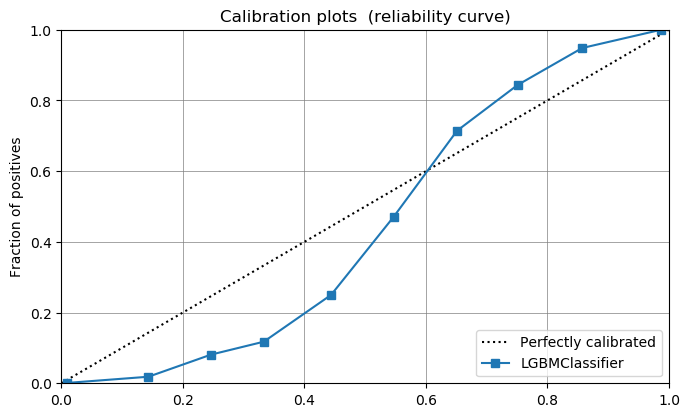

In [41]:
##GRÁFICO: CURVA DE CONFIABILIADADE

plot_model(final_lightgbm, plot='calibration')

<h5>OBSERVANDO O GRÁFICO, É NOTÓRIA A DISPERSÃO DO MODELO EM RELAÇÃO A LINHA

In [42]:
##CALIBRANDO O MODELO

calibrated = calibrate_model(final_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9056,0.9651,0.9344,0.8832,0.9081,0.8112,0.8126
1,0.9249,0.9764,0.9459,0.9074,0.9263,0.8497,0.8505
2,0.9114,0.9697,0.9189,0.9049,0.9119,0.8227,0.8228
3,0.9171,0.9741,0.9344,0.9030,0.9184,0.8343,0.8348
4,0.9094,0.9645,0.9115,0.9080,0.9098,0.8189,0.8189
5,0.8863,0.9561,0.8923,0.8821,0.8872,0.7726,0.7727
6,0.9037,0.9620,0.9077,0.9008,0.9042,0.8073,0.8073
7,0.8998,0.9693,0.9385,0.8714,0.9037,0.7996,0.8020
8,0.9326,0.9821,0.9423,0.9245,0.9333,0.8651,0.8653
9,0.9266,0.9762,0.9459,0.9108,0.9280,0.8533,0.8539


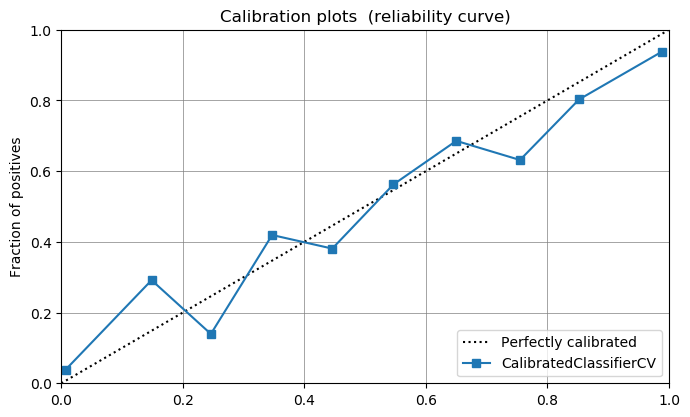

In [43]:
##GRÁFICO: CURVA DE CONFIABILIDADE APÓS CALIBRAR O MODELO

plot_model(calibrated, plot='calibration')

In [44]:
##CALIBRANDO O MODELO USANDO O MÉTODO ISOTONIC

calibrated_isotonic = calibrate_model(final_lightgbm, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9094,0.9643,0.9421,0.8841,0.9121,0.8189,0.8207
1,0.9306,0.9769,0.9614,0.9055,0.9326,0.8613,0.8629
2,0.9133,0.9693,0.9228,0.9053,0.9140,0.8266,0.8267
3,0.9191,0.9744,0.9382,0.9033,0.9205,0.8382,0.8388
4,0.9114,0.9648,0.9154,0.9084,0.9119,0.8227,0.8228
5,0.8902,0.9571,0.9115,0.8745,0.8927,0.7803,0.7810
6,0.9037,0.9612,0.9154,0.8947,0.9049,0.8073,0.8075
7,0.9037,0.9692,0.9462,0.8723,0.9077,0.8073,0.8102
8,0.9345,0.9813,0.9462,0.9248,0.9354,0.8690,0.8692
9,0.9286,0.9764,0.9575,0.9051,0.9306,0.8571,0.8586


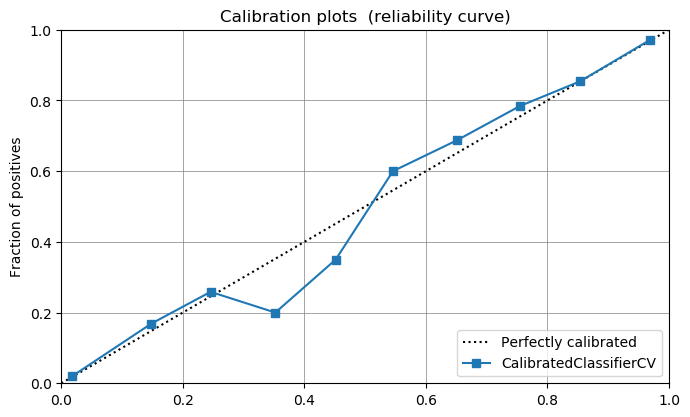

In [45]:
##GRÁFICO: CURVA DE CONFIABILIDADE APÓS CALIBRAR COM O MÉTODO ISOTONIC

plot_model(calibrated_isotonic, plot='calibration')

<h5>APÓS FINALIZADAS AS ANÁLISES COM O PYCARET, TEMOS O RESULTADO DE QUE O MODELO LGBM BEM CALIBRADO POSSA DAR RESULTADOS PROMISSORES.

<h2>5. CRIANDO O MODELO LGBM USANDO O SCIKIT

In [10]:
##CRIANDO O DATASET COM OS DADOS DE TESTE

df_teste = pd.read_csv('tcc_teste.csv', delimiter=';', encoding='latin-1')
df_teste = df_teste.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [37]:
##IMPORTANDO AS LIBS E CRIANDO O MODELO

import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score


X=df.drop(cols2, axis=1)
Y=df.evadiu 
sc=StandardScaler() #ESCALANDO AS FEATURES
sc.fit(df.drop(cols2, axis=1))
X=pd.DataFrame(sc.fit_transform(df.drop(cols2, axis=1)))#REALIZANDO O SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#CONVERTENDO O DATASET PARA O FORMATO CORRETO DO LGBM
d_train=lgb.Dataset(X_train, label=y_train)#ESPECIFICANDO O PARÂMETRO
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GRADIENT BOOSTING DECISION TREE
params['objective']='binary' #ALVO BINÁRIO
params['metric']='binary_logloss' #MÉTRICA PARA A CLASSIFICAÇÃO BINÁRIA
params['max_depth']=10 #TREINANDO O MODELO 
clf=lgb.train(params,d_train,100) #TREINANDO O MODELO COM 100 ÉPOCAS
y_pred=clf.predict(X_test) #CRIANDO A PREDIÇÃO

In [38]:
##AVALIANDO A ACURÁCIA DO MODELO

y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
roc_auc_score(y_pred,y_test)

0.7781414195386944

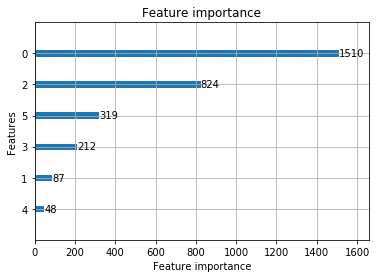

In [39]:
##GRÁFICO: IMPORTÂNCIA DAS FEATURES

lgb.plot_importance(booster=clf)

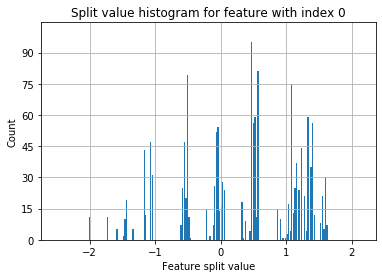

In [44]:
##GRÁFICO: HISTOGRAMA DA FEATURE ID 

lgb.plot_split_value_histogram(booster=clf, feature=0)

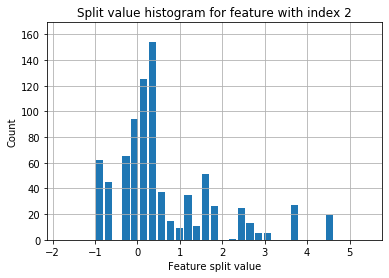

In [45]:
##GRÁFICO: HISTOGRAMA DA FEATURE ATINGIU_MEDIA

lgb.plot_split_value_histogram(booster=clf, feature=2)

In [46]:
##BALANCEAMENTO DO DATASET USANDO O SMOTE

smt = SMOTE()
X, Y = smt.fit_sample(X, Y)

In [47]:
##TREINANDO NOVAMENTE O MODELO

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)#CONVERTENDO O DATASET PARA O FORMATO CORRETO DO LGBM
d_train=lgb.Dataset(X_train, label=y_train)#ESPECIFICANDO O PARÂMETRO
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GRADIENT BOOSTING DECISION TREE
params['objective']='binary' #ALVO BINÁRIO
params['metric']='binary_logloss' #MÉTRICA PARA A CLASSIFICAÇÃO BINÁRIA
params['max_depth']=10 #TREINANDO O MODELO 
clf=lgb.train(params,d_train,100) #TREINANDO O MODELO COM 100 ÉPOCAS
y_pred=clf.predict(X_test) #CRIANDO A PREDIÇÃO

In [48]:
##VERIFICANDO A ACURÁCIA

y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
roc_auc_score(y_pred,y_test)

0.8943397465415373

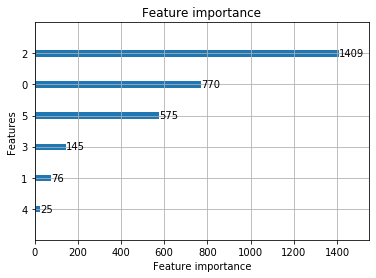

In [49]:
##GRÁFICO: IMPORTÂNCIA DAS FEATURES

lgb.plot_importance(booster=clf)

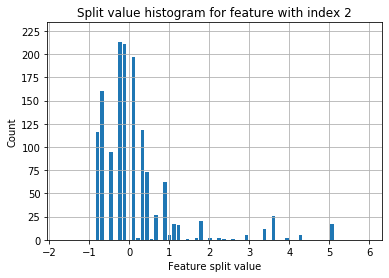

In [50]:
##GRÁFICO: HISTOGRAMA DA FEATURE ATINGIU_MEDIA

lgb.plot_split_value_histogram(booster=clf, feature=2)

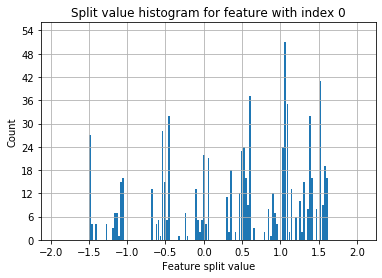

In [51]:
##GRÁFICO: HISTOGRAMA DA FEATURE ID

lgb.plot_split_value_histogram(booster=clf, feature=0)

<h2>6. CONCLUSÃO

<h5>APÓS TODO ESTE PROCESSO DE ANÁLISE E FEITOS CRUZAMENTOS DOS DADOS, FOI CONCLUÍDO QUE, COM BASE NOS PARÂMETROS QUE FORAM EXTRAÍDOS,
O MODELO RETORNOU RESULTADOS CONDIZENTES COM O ESTUDO, TENDO UM DESEMPENHO ACEITÁVEL, ACUSANDO UMA TAXA DE FALSOS NEGATIVOS MAIS BAIXA
EM RELAÇÃO AOS FALSOS POSITIVOS, O QUE INDICA QUE COM UM POLIMENTO MAIOR PODE RETORNAR NÚMEROS MUITO PROMISSORES.